In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression 
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [2]:
data = pd.read_csv("housing.csv")
data = data.dropna(axis=0, how="any")
target = data.pop("median_house_value")

In [3]:
samples, features = data.shape
print(f"Dataset contains {samples} samples and {features} features.")

Dataset contains 20433 samples and 8 features.


In [4]:
data.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
count,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000
mean,-119.570689,35.633221,28.633094,2636.504233,537.870553,1424.946949,499.433465,3.871162
std,2.003578,2.136348,12.591805,2185.269567,421.385070,1133.208490,382.299226,1.899291
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900
25%,-121.800000,33.930000,18.000000,1450.000000,296.000000,787.000000,280.000000,2.563700
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.536500
75%,-118.010000,37.720000,37.000000,3143.000000,647.000000,1722.000000,604.000000,4.744000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100


In [5]:
data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
0,-122.23,37.88,41,880,129.0,322,126,8.3252
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014
2,-122.24,37.85,52,1467,190.0,496,177,7.2574
3,-122.25,37.85,52,1274,235.0,558,219,5.6431
4,-122.25,37.85,52,1627,280.0,565,259,3.8462


In [6]:
lr_model = LinearRegression()
lr_model.fit(data, target)
print(lr_model.coef_)
print(lr_model.intercept_)

[-4.27301205e+00 -4.25097369e+00  1.15790031e-01 -8.24972507e-04
  1.13820707e-02 -3.83855780e-03  4.77013513e-03  4.02975217e+00]
-358.53957478926304


In [7]:
data_test = data.iloc[3:4,:] # Test with arbitrary row from index 3 of input data.
target_test = lr_model.predict(data_test) # Predict target with trained model.
print(f"Actual target: {target[3]}; Estimated target: {target_test}.") # Print the actual target and estimation by the model.

Actual target: 34.13; Estimated target: [32.22468549].


In [8]:
target_test_2 = lr_model.predict(data)
mse = mean_squared_error(target, target_test_2)
mae = mean_absolute_error(target, target_test_2)
print(f"Model MSE: {mse}; Model MAE: {mae}")

Model MSE: 48.38057779640017; Model MAE: 5.0799630728952865


In [9]:
data_new_df = data.copy().loc[range(200), "median_income"]
data_new = data_new_df.values.reshape(-1, 1) # Convert to numpy array and reshape because LR model doesn't support one dimensional arrays
target_new = target.copy().loc[range(200)]


In [10]:
lr_model_new = LinearRegression()
lr_model_new.fit(data_new, target_new)

LinearRegression()

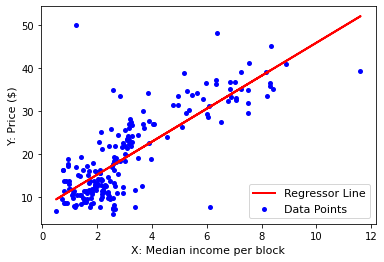

In [11]:
figure, axes = plt.subplots()
axes.scatter(data_new, target_new, color="blue", marker=".", linewidth=2, label="Data Points")
axes.set_xlabel(f"X: Median income per block", fontsize=11)
axes.set_ylabel(f"Y: Price ($)", fontsize=11)
target_prediction = lr_model_new.predict(data_new)
axes.plot(data_new, target_prediction, color="red", linewidth=2, label="Regressor Line")
axes.legend(fontsize=11)
plt.show()

In [12]:
print(target_prediction)

[39.51130394 39.41968891 35.40094545 29.18690564 22.26997066 23.0036608
 21.54975333 19.47455735 15.47275113 21.67331814 19.79444009 20.05388771
 19.30133565 17.75619808 14.84260908 15.64443308 18.14652431 15.6259561
 15.12900229 17.48558729 12.69119555 14.06041686 14.10468463 15.85845812
 17.47288437 16.71763775 16.9328176  14.42418243 13.78672658 13.96033321
 14.88379735 15.0150609  14.38145441 12.75740474 17.97445742 13.18506987
 11.68804944 12.89328754 20.86033096 17.43362078 15.53973019 12.41173121
 11.41012484 22.72458139 19.06074996 17.76851607 15.26334534 14.14240847
 11.12373163 14.29715319 11.01286974 13.2558983  11.74040088 12.26660992
 13.66123708 12.89713691 13.26051754 10.61022552 12.14958904 17.32853295
 20.52505073 31.0161268  10.93318776 12.04912045 17.44901827 11.95558073
 10.56557282 17.50906845 14.59201502 11.23767302 14.28522014 10.26917124
 14.20091891  9.38882006 17.02250794 11.0217233  16.88162096 11.7415557
 10.5540247  15.20714452 13.23857613 11.95558073 13.31